<a href="https://colab.research.google.com/github/retolador/machine_learning_retolador/blob/master/wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler

In [ ]:
wine = datasets.load_wine()

In [ ]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
#number of the atributtes
wine.data.shape[1]

13

In [ ]:
#Define the sigmoid function
def sigmoid(z):
  return 1.0/(1 + math.e ** (-z))

In [ ]:
#prediction function
def predict(sample):
  result  = 0.0
  for i in range(len(sample)):
    result = result + weights[i] * sample[i]
    
  result = result + bias
  return sigmoid(result)

In [ ]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

In [ ]:
num_features = wine.data.shape[1]

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0] * num_features
  db = 0.0

  global bias, weights

  
 
  m = len(x_train_samples)

  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample, predicted)
    
    # dz is the derivative of the loss function
    dz = predicted - y_sample
    
    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

#Classify the class_0 wine
1- Train the model
2- Get the results

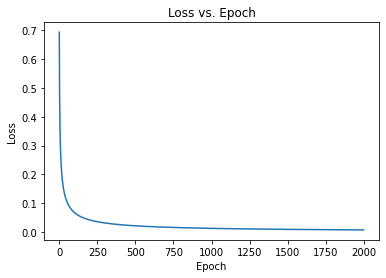

In [ ]:
weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.2

epochs = 2000

x_train_samples = wine.data

 #normalize the data to compute the samples
scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)

y_train_samples = [1 if y == 0 else 0 for y in wine.target] # 0 means classs 0 

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

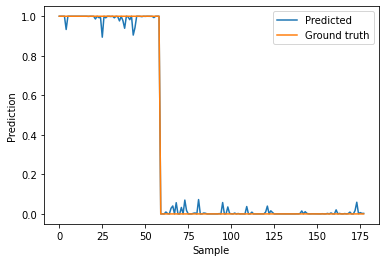

Accuracy: 100.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))

##Conclusion
With learning_rate = 0.2 and 2000 epochs we get the 100% of accuracy

#Classify the Class 1 wine
Same as the class 0
1-Train the model
2- Get the results

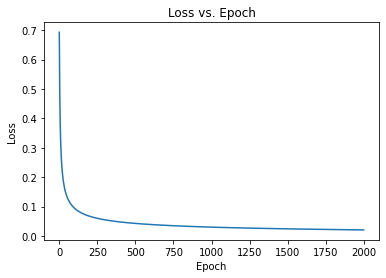

In [ ]:
weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.2

epochs = 2000

x_train_samples = wine.data

 #normalize the data to compute the samples
scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)

y_train_samples = [1 if y == 1 else 0 for y in wine.target] # 1 means classs 1 

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

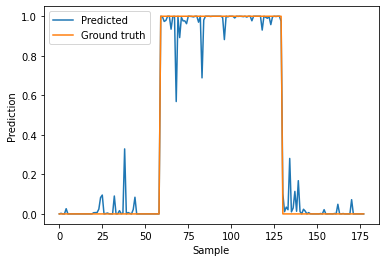

Accuracy: 100.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))

##Conclusion
The results are perfects with the same inputs.
And finally the last class

#Classify The class 2 wine


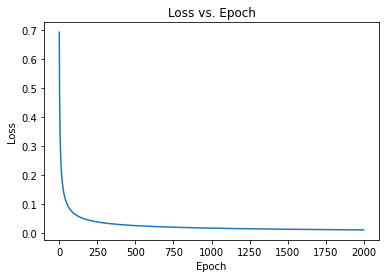

In [ ]:
weights = [0.0] * num_features
bias = 0.0

learning_rate = 0.2

epochs = 2000

x_train_samples = wine.data

 #normalize the data to compute the samples
scaler = StandardScaler()
x_train_samples = scaler.fit_transform(wine.data)

y_train_samples = [1 if y == 2 else 0 for y in wine.target] # 0 means classs 0 

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples, y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Loss vs. Epoch')
plt.show()

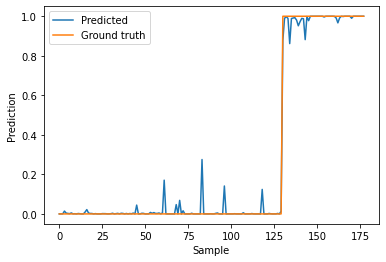

Accuracy: 100.00 %


In [ ]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1.0

plt.plot(range(m), predictions, label='Predicted')
plt.plot(range(m), y_train_samples, label='Ground truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')
plt.show()

print('Accuracy: %.2f %%' % (100 * correct/m))

#Conclusion
We see with the learning_rate = 0.2 and epoch = 2000 we get the perfect classification in the three categories.
I think this classification is more easily than the irirs because we have more atributtes to identify every class.